# bayesian belief network

##Attribute Information:

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type
</ul>
  <li>Value 1: typical angina</li>
  <li>Value 2: atypical angina</li>
  <li>Value 3: non-anginal pain</li>
  <li>Value 4: asymptomatic</li>
</ul>

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results
</ul>
<li>Value 0: normal</li>
<li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li>
<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria</li>
</ul>

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
</ul>
<li>Value 1: upsloping</li>
<li>Value 2: flat</li>
<li>Value 3: downsloping</li>
</ul>

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Heartdisease: It is integer valued from 0 (no presence) to 4.

In [ ]:
!pip install pgmpy
!pip install networkx

In [6]:
import pandas as pd
import numpy as np
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pgmpy'

In [1]:
df=pd.read_csv("D:\github\ML-LAB\program-8\8-dataset.csv")
df.head()

NameError: name 'pd' is not defined

In [ ]:
print(df.info())
print(pd.unique(df['age']))

In [ ]:
model= BayesianModel([('age','heartdisease'),('gender','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])

In [ ]:
model.fit(df,estimator=MaximumLikelihoodEstimator)

In [ ]:
print('\n Inferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)


 Inferencing with Bayesian Network:


In [ ]:
print('\n 1. Probability of HeartDisease given evidence= cp')
q1=HeartDisease_infer.query(variables=['heartdisease'],evidence={'gender':1})
print(q1)


 1. Probability of HeartDisease given evidence= cp
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3293 |
+-----------------+---------------------+
| heartdisease(1) |              0.2151 |
+-----------------+---------------------+
| heartdisease(2) |              0.1887 |
+-----------------+---------------------+
| heartdisease(3) |              0.1480 |
+-----------------+---------------------+
| heartdisease(4) |              0.1189 |
+-----------------+---------------------+


/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [ ]:
print('\n 1. Probability of HeartDisease given evidence= restecg')
q2=HeartDisease_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q2)


 1. Probability of HeartDisease given evidence= restecg
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1016 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2361 |
+-----------------+---------------------+
| heartdisease(3) |              0.2017 |
+-----------------+---------------------+
| heartdisease(4) |              0.4605 |
+-----------------+---------------------+


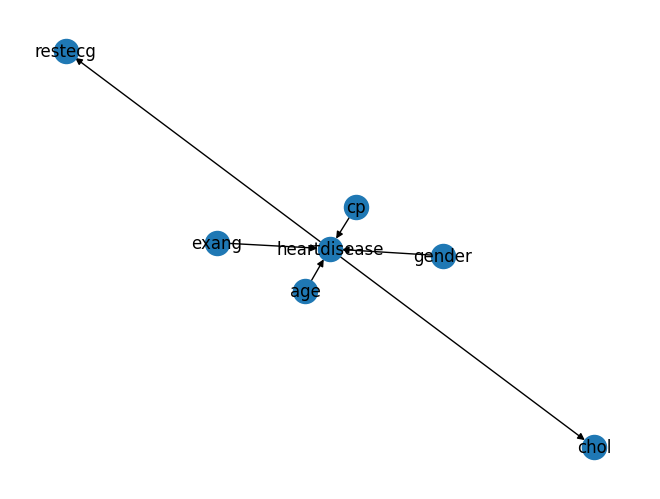

In [ ]:
graph = nx.DiGraph(model.edges())
nx.draw_networkx(graph,with_labels=True)
#plot
plt.show()
